<a href="https://colab.research.google.com/github/vitalns/pairplot/blob/main/pairplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
<h2> <font color='blue'>Построение парной диаграммы </font> </h2>
</div>

Примеры посторения парной диаграммы с помощью pairplot и pairgrid. Используется датасет penguins. На графики добавлены маркеры средних значений, анотации, легенда.

#*Построение парной диаграммы*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## *Предобработка данных*

In [3]:
# Загрузим датасет "Пингвины"

penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)
penguins.reset_index(drop=True, inplace=True)

In [4]:
# Создадим таблицу со средними значениями.

species = penguins.species.unique()
# # Раньше и так отлично работало
# averages = [penguins[penguins['species']==i].mean().to_list() for i in species]
averages = [penguins[penguins['species']==i][penguins.select_dtypes(np.number).columns].mean().to_list() for i in species]
avg_data = pd.DataFrame(averages, columns=penguins.select_dtypes(np.number).columns)
avg_data['species'] = species
avg_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,38.823973,18.347260,190.102740,3706.164384,Adelie
1,48.833824,18.420588,195.823529,3733.088235,Chinstrap
2,47.568067,14.996639,217.235294,5092.436975,Gentoo


In [5]:
# Добавим средние значения характеристик к общей таблице.

avg = avg_data.copy(deep=True)
avg.species = 'mean' # Добавляем заглушку для hue в pairgrid.
penguins_avg = pd.concat([penguins, avg], ignore_index=True)
penguins_avg.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female
332,Gentoo,Biscoe,49.900000,16.100000,213.000000,5400.000000,Male
333,mean,NaN,38.823973,18.347260,190.102740,3706.164384,NaN
334,mean,NaN,48.833824,18.420588,195.823529,3733.088235,NaN
335,mean,NaN,47.568067,14.996639,217.235294,5092.436975,NaN


##*Построение парной диаграммы с помощью pairplot*

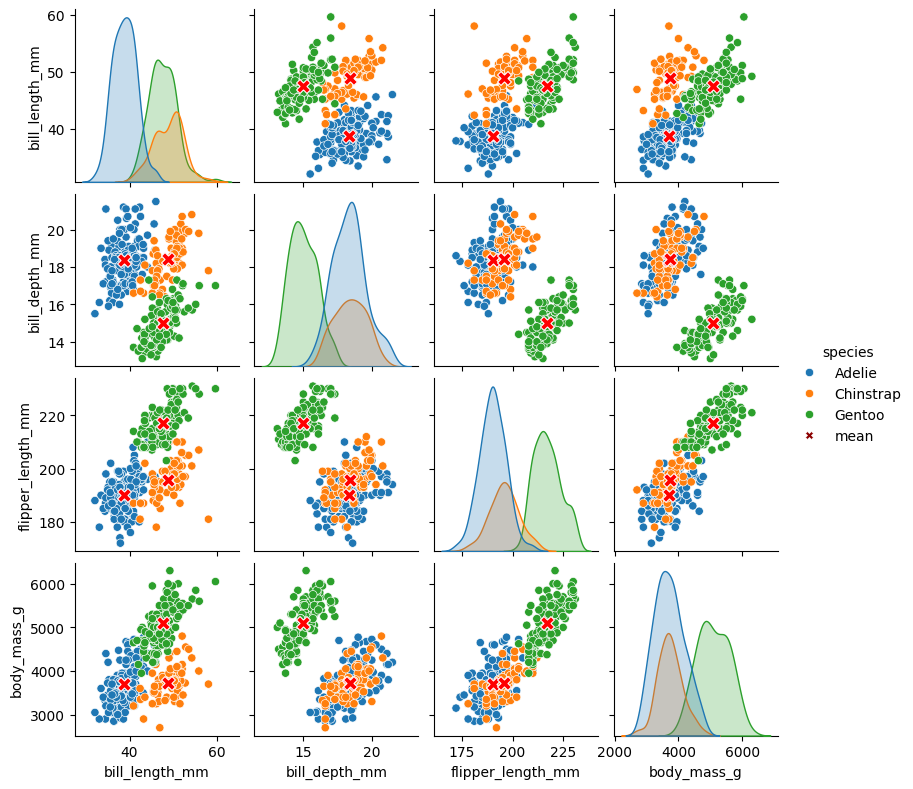

In [28]:
# Построим парную диаграмму с помощью pairplot и добавим средние значения на график.

g = sns.pairplot(data=penguins_avg,  # Используем датасет со средними значениями, чтобы маркер добавился на легенду
                 hue='species',
                 diag_kind='None', # На диагональ добавим графики отдельно без средних значений
                 markers=['o', 'o', 'o', 'X'],
                 palette= sns.color_palette('tab10')[:3] + ['darkred'],  # по умолчанию palette='tab10'
                #  plot_kws=dict(alpha=.8, # Портит легенду
                #                size=penguins_avg.apply(lambda x: 100 if x.species=='mean' else 50, axis=1)),  # Размер маркера меняется, но портит легенду.
                 height=2  # Масштаб графика
                 )
# В легенде по умолчанию используется список созданных экземпляров из hue.
# g.add_legend(legend_data=g._legend_data)
# g._legend.remove()  # Убрать легенду можно используя метод remove

# Добавим на диагональные графики kdeplot, исключив средние значения.
g.map_diag(sns.kdeplot, fill=True,
           data=penguins_avg[penguins_avg.species != 'mean'],
           hue='species'
           )


# Настроим размер маркера среднего значения наложив диаграмму "поверх", так как plot_kws=dict(size=[...] портит легенду.
g.data = penguins_avg[penguins_avg.species == 'mean']
g.map_offdiag(func=sns.scatterplot,
              hue=None,  # Необходимо сбросить hue, чтобы маркеру среднего задать новые установки
              s=100, marker='X', color='r')

# # C включённым hue не получается задать размер маркера через список или функцию.
# g.map_offdiag(func=plt.scatter,
#               marker='v', s=50, color='g',
#               data=penguins_avg[penguins_avg.species == 'mean'],
#               # size=penguins_avg.apply(lambda x: 200 if x.species=='mean' else 50, axis=1)
#               )

##*Построение парной диаграммы с помощью pairgrid*

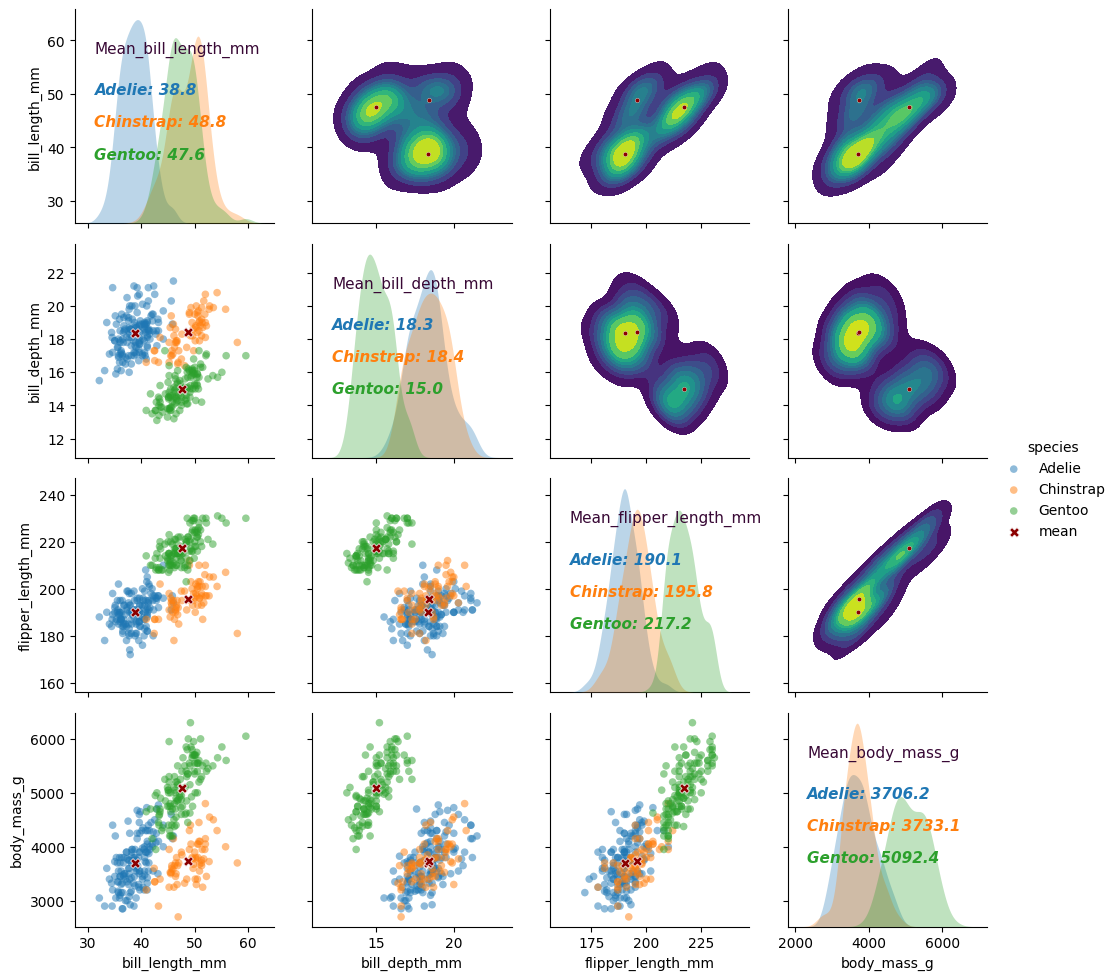

In [75]:
# Построим парную диаграмму с помощью pairgrid и добавим анотацию на диагональные графики.

g = sns.PairGrid(penguins_avg,  # Полный датасет с добавленным средними значениями (species="mean")
                 hue='species',
                 diag_sharey=False,  # Необходимое условие, чтобы диаграммы kde по диагонали масштабировались под ось Y.
                #  palette='tab10',  # по уиолчанию
                 hue_kws = dict(marker=['o', 'o', 'o', 'X'],
                                s=[30, 30, 30, 50],
                                color= sns.color_palette('tab10')[:3] + ['darkred'],
                                alpha=[.5, .5, .5, 1],
                                edgecolors=['none', 'none', 'none', 'white'],
                                linewidth = [.5]*4
                                ),
                #  height=2
                 )

# На нижних графиках построим диаграммы рассеяния.
# Сделаем маркер среднего большего размера и формы 'X'.
# Похоже чтобы изменить тип и размер маркера проще наложить диаграмму "поверх", используя g.data как выше.

# plt.scatter принимает  (marker='v', s=50, color='g'), но списки не принимает,
# а sns.scatterplot - (markers=[], size=[], palette=[]).
g.map_lower(func=plt.scatter,  # Работает, но некрасивый график.
            # marker='v', s=50, color='g'  #  hue_kws в приоритете.
            )
# sns.scatterplot не цепляют настройки из hue_kws, но можно указать size, markers, palette в g.map().
# g.map_lower(sns.scatterplot,
#             # size=penguins_avg.apply(lambda x: 100 if x.species=='mean' else 50, axis=1), # работает, портит легенду
#             # size=dict(zip(g._hue_order, [50, 50, 50, 100])), # ошибки нет, ничего не строит
#             # markers=penguins_avg.apply(lambda x: 'X' if x.species=='mean' else 'o', axis=1), # ошибки нет, но ничего не меняется
#             # palette=dict.fromkeys(g._hue_order, sns.color_palette('tab10')[:3] + ['darkred']) # ошибки нет, но ничего не меняется
#             )
# Похоже чтобы изменить тип и размер маркера проще наложить диаграмму "поверх", используя g.data как выше.

g.add_legend()

# Добавим на диагональные элементы анотацию со средними значениями.

# Не нашёл в seaborn аналог get_color() из plt, поэтому создал словарь с цветами в соответствии с hue_order.
cmap_hue = dict(zip(g._hue_order[:3], sns.color_palette('tab10')[:3]))

def annotate_func(*args, **kwargs):
  data = args[0]
  mean = data.mean()
  ax = plt.gca()
  # Каждое значения species из списка hue нужно записать с новой строки,
  # поэтому будем считать сколько экземпляров дочернего класса matplotlib.text.Annotation уже есть.
  # Можно считать экземпляры matplotlib.text.Text, но так как на графике уже есть подписи, то начальное значение не нулевое.
  n = len([c for c in ax.get_children() if isinstance(c, matplotlib.text.Annotation)])
  pos = (.1, .6 - .15*n)
  if n == 0:  # Добавим заглавие фичи для которой вычесляем среднее
    ax.text(.1,.85,
            f"Mean_{args[0].name}",
            size=11, weight='roman', stretch='condensed', color='xkcd:eggplant',
            va='top',  # По умолчанию ha='left' и va='bottom'
            transform=ax.transAxes
            )
  if kwargs['label'] in g._hue_order[:3]:  # Добавим анотацию для средних значений для всех species из фрейма кроме mean.
    sns.kdeplot(data, fill=True, linewidth=0, alpha=0.3)  # Добавить график без заливки в качестве фона.
    ax.annotate(f"{kwargs['label']}: {mean:.1f}",
                size=11, style='oblique', weight='semibold',
                c=cmap_hue[kwargs['label']],
                xy=pos, xycoords=ax.transAxes
                )
g.map_diag(annotate_func)

# На верхние графики добавим диаграммы "плотности", строим в последнюю очередь, так как сбрасываем hue.
g.map_upper(sns.kdeplot,
            fill=True, cmap='viridis',
            data=penguins, hue=None  # Используем данные без средних значений
            )
# Добавим вершины
g.data = penguins_avg[penguins_avg.species == 'mean']
g.map_upper(sns.scatterplot,
            hue=None,  # Необходимо сбросить hue, чтобы маркеру задать новые установки
            s=10, marker='o', c='darkred')


---

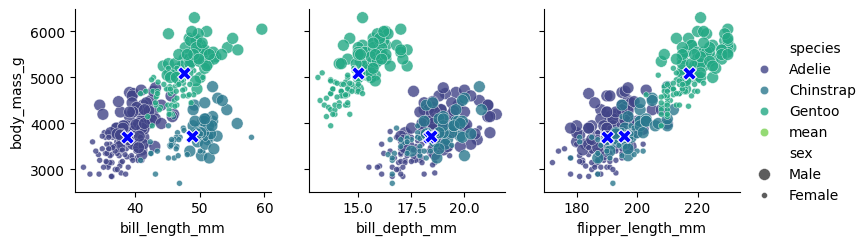

In [8]:
# Ещё пример построения парной диаграммы с pairgrid.

x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
y_vars = ['body_mass_g']
g = sns.PairGrid(penguins_avg,
                 hue='species',
                 x_vars=x_vars,
                 y_vars=y_vars,
                 palette='viridis'
                 )
g.map_offdiag(sns.scatterplot,
              size=penguins.sex,
              alpha=0.8
              )

# Добавим средние значения
g.data = avg
g.map_offdiag(func=sns.scatterplot, s=100, marker='X', hue=None, c='b')

g.add_legend(title='',
             adjust_subtitles=True  # Выравнивает текст на легенде
             )